In [ ]:
# Data set link- https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white',color_codes=True)
from collections import Counter
import sklearn
import re

import warnings
warnings.filterwarnings("ignore")

In [102]:
df=pd.read_csv('C:/Users/DHRUVIL/Desktop/Freelancing/Blog1 - Essential of ML algorithms/Tutorial.csv') #Copy the file path. As you paste it, replace '\' with '/'

In [103]:
df.head() #To view the first 5 rows of the data. Just to get a gist of it

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [104]:
#For our purposes, we will keep it simple and use Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type,
#Item_MRP, Outlet_Location_Type and Item_Outlet_Sales. And of course, our predicted varible - Item_Outlet_Sales
df=df[['Item_Fat_Content', 'Item_Visibility', 'Item_Type','Item_MRP', 'Outlet_Location_Type' ,'Item_Outlet_Sales']]


In [105]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,Tier 1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,Tier 3,443.4228
2,Low Fat,0.016760,Meat,141.6180,Tier 1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,Tier 3,732.3800
4,Low Fat,0.000000,Household,53.8614,Tier 3,994.7052


In [106]:
df.shape #8523 rows and 6 columns

(8523, 6)

In [107]:
#First, let's do some basic pre-processing. This includes checking for any missing (NA) values and 
#encoding categorical variables
df.isna().sum() #This function returns the count of missing values in each of our column. Looks like we have no missing values

Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Location_Type    0
Item_Outlet_Sales       0
dtype: int64

In [108]:
#Categorical variables have to be encoded. Our ML model cannot take 'Dairy' or 'Meat' (in Item_Type) as an input in our model
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
encode.fit(df['Item_Fat_Content']) #Fits on the categories in Item_Fat_Content
df['Item_Fat_Content']=encode.transform(df['Item_Fat_Content']) #Transforms and returns the column
encode.fit(df['Item_Type']) #Fits on the categories in Item_Fat_Content
df['Item_Type']=encode.transform(df['Item_Type']) #Transforms and returns the column
encode.fit(df['Outlet_Location_Type']) #Fits on the categories in Item_Fat_Content
df['Outlet_Location_Type']=encode.transform(df['Outlet_Location_Type']) #Transforms and returns the column


In [109]:
df.head() #We have successfuly transformed our categorical variables

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Item_Outlet_Sales
0,1,0.016047,4,249.8092,0,3735.1380
1,2,0.019278,14,48.2692,2,443.4228
2,1,0.016760,10,141.6180,0,2097.2700
3,2,0.000000,6,182.0950,2,732.3800
4,1,0.000000,9,53.8614,2,994.7052


In [110]:
#Now we create our train set and validation set
X=df.loc[:,df.columns!='Item_Outlet_Sales']
y=df['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2) #20% of the data is kept aside for validation

In [112]:
print(X_train.shape,y_train.shape)

(6818, 5) (6818,)


In [113]:
print(X_val.shape,y_val.shape)

(1705, 5) (1705,)


## KNN Regression

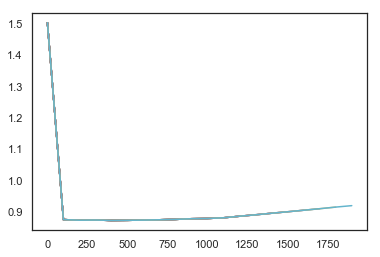

In [126]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
error_list=[] #Store error for each neighbour value in the loop below
neighbour_list=[]
#For different neighbours, we check the log of validation mean squared error. As we can see, the error is minimum at around 100-125 neighbours
for i in range(1,2000,100): #For i = 1,101,201,..,1901
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    predictions=model.predict(X_val)
    error=mean_squared_log_error(y_val,predictions)
    error_list.append(error)
    neighbour_list.append(i)
    sns.lineplot(x=neighbour_list,y=error_list)

## Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_val)
error=mean_squared_error(y_val,predictions)
print(error)

1873409.1943103147


## Decision Tree

In [142]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion='mse',min_impurity_decrease=0.2) #There are many parameters you can vary (not cumpolsory but highlly advisable).
model.fit(X_train,y_train)
predictions=model.predict(X_val)
error=mean_squared_error(y_val,predictions)
print(error)

3732251.8796063676


## The above three were regression models. Just for the sake of this tutorial, we will convert this same problem to a classification one. Only to try the classification models and save you some time processing another data set

In [143]:
median=np.median(df['Item_Outlet_Sales']) # We will assign 1 to sales>median sales and 0 to the rest
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].apply(lambda x: 1 if x>median else 0)


In [144]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Item_Outlet_Sales
0,1,0.016047,4,249.8092,0,1
1,2,0.019278,14,48.2692,2,0
2,1,0.016760,10,141.6180,0,1
3,2,0.000000,6,182.0950,2,0
4,1,0.000000,9,53.8614,2,0


In [145]:
#Now we create our train set and validation set
X=df.loc[:,df.columns!='Item_Outlet_Sales']
y=df['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2) #20% of the data is kept aside for validation

## Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_val)
print(accuracy_score(y_val,predictions)*100) #Prints accuracy %

72.6099706744868


## Naive Bayes

In [158]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
predictions=model.predict(X_val)
print(accuracy_score(y_val,predictions)*100)

73.0791788856305


## Decision Tree Classifier

In [160]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(min_impurity_decrease=0.2) #There are many parameters you can vary (not cumpolsory but highlly advisable).
model.fit(X_train,y_train)
predictions=model.predict(X_val)
error=accuracy_score(y_val,predictions)
print(accuracy_score(y_val,predictions)*100)

49.03225806451613


### End Note: These are very basic algorithms. But extremely important to understand before you step into advanced algorithms like Neural Nets or XGBoost. The tutorial was just to introduce with the coding part of ML. Feel free to play around with the parameters